---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

24
19
None


<IPython.core.display.Javascript object>


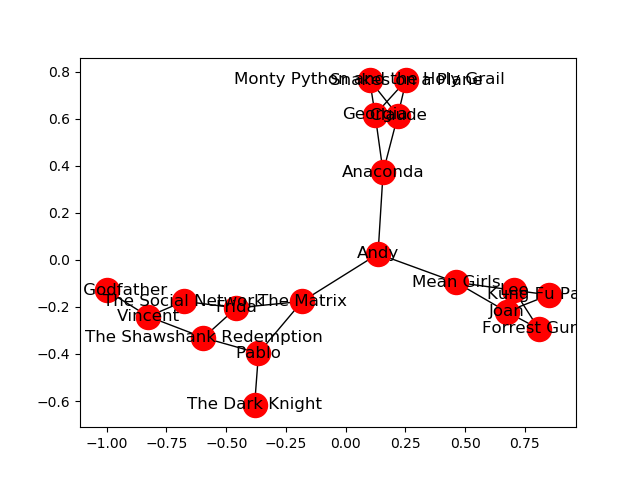

/home/sersavn/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [16]:
def answer_one():    
    with open('Employee_Movie_Choices.txt', 'r') as f:
        network_data = f.readlines()
    network_data = network_data[1:]
    nodes_l = [i.split('\t')[0] for i in network_data]
    nodes_r = [i.split('\t')[1][:-1] for i in network_data]
    edges = []
    for i,j in zip(nodes_l, nodes_r):
        edges.append((i,j))
    B = nx.Graph()
    B.add_nodes_from(nodes_l, bipartite = 0)
    B.add_nodes_from(nodes_r, bipartite = 1)
    B.add_edges_from(edges)
    return B

def answer_one_check():
    print(len(answer_one().edges(data=True)))
    print(len(answer_one().nodes(data=True)))
    return None

print(answer_one_check())
plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [20]:
def answer_two():
    a_2 = answer_one()
    for i in a_2.nodes(data=True):
        if i[1]['bipartite'] == 0:
            nx.set_node_attributes(a_2, 'employee', 'type')
        if i[1]['bipartite'] == 1:
            nx.set_node_attributes(a_2, 'movie', 'type')
    return a_2

answer_two().nodes(data=True)

NodeDataView({'Andy': {'bipartite': 0, 'type': 'movie'}, 'Claude': {'bipartite': 0, 'type': 'movie'}, 'Frida': {'bipartite': 0, 'type': 'movie'}, 'Georgia': {'bipartite': 0, 'type': 'movie'}, 'Joan': {'bipartite': 0, 'type': 'movie'}, 'Lee': {'bipartite': 0, 'type': 'movie'}, 'Pablo': {'bipartite': 0, 'type': 'movie'}, 'Vincent': {'bipartite': 0, 'type': 'movie'}, 'Anaconda': {'bipartite': 1, 'type': 'movie'}, 'Mean Girls': {'bipartite': 1, 'type': 'movie'}, 'The Matrix': {'bipartite': 1, 'type': 'movie'}, 'Monty Python and the Holy Grail': {'bipartite': 1, 'type': 'movie'}, 'Snakes on a Plane': {'bipartite': 1, 'type': 'movie'}, 'The Shawshank Redemption': {'bipartite': 1, 'type': 'movie'}, 'The Social Network': {'bipartite': 1, 'type': 'movie'}, 'Forrest Gump': {'bipartite': 1, 'type': 'movie'}, 'Kung Fu Panda': {'bipartite': 1, 'type': 'movie'}, 'The Dark Knight': {'bipartite': 1, 'type': 'movie'}, 'The Godfather': {'bipartite': 1, 'type': 'movie'}})

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [21]:
def answer_three():
    a_3 = answer_two()
    weighted_p_graph = bipartite.weighted_projected_graph(a_3, employees)
    return weighted_p_graph

print(answer_three().edges(data=True))
plot_graph(answer_three())

EdgeDataView([('Georgia', 'Claude', {'weight': 3}), ('Georgia', 'Andy', {'weight': 1}), ('Claude', 'Andy', {'weight': 1}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Lee', 'Andy', {'weight': 1}), ('Lee', 'Joan', {'weight': 3}), ('Pablo', 'Andy', {'weight': 1}), ('Andy', 'Joan', {'weight': 1})])

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [22]:
def answer_four():
    def q3_df():
        a_3 = answer_three().edges(data=True)
        a_3_df = []
        s_names = []
        
        for i in a_3:
            s_names.append(sorted([i[0], i[1]]))
        
        for i,j in zip(a_3, s_names):
            a_3_df.append({'name1' : j[0],
                           'name2' : j[1],
                           'movies' : i[2]['weight']})
            
            df = pd.DataFrame(a_3_df)
        return df
    
    def q4_df():
        a_4 = answer_three()
        with open('Employee_Relationships.txt', 'r') as f:
            relationship_scores = f.readlines()
        a_4_df = []
        for i in relationship_scores:
            a_4_df.append({'name1' : i.split('\t')[0],
                                          'name2' : i.split('\t')[1],
                                          'score' : i.split('\t')[2].split('\n')[0]})
        df = pd.DataFrame(a_4_df)
        return df
    
    q3_df = q3_df()
    q4_df = q4_df()
    q4_df = q4_df.merge(q3_df, how = 'outer')
    q4_df = q4_df.set_index(['name1', 'name2'])
    q4_df = q4_df.fillna(value=0)
    q4_df['score'] = q4_df['score'].astype(int)
    
    resulted_df = q4_df.corr()
    resulted_cell = float(resulted_df.iloc[1][0])
    return resulted_cell

answer_four()

0.7883962221733476